In [4]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
start = dt.datetime(2020, 3, 13)
end = dt.datetime(2021, 3, 19)

prices = web.DataReader('AAPL', 'yahoo', start, end)['Close']

In [6]:
# calculates the percentage change between the current and prior price
returns = prices.pct_change()

# abstract last price
last_price = prices[-1]

# Number of Simulations
num_simulations = 10000
num_days = 252

In [10]:
# data frame for simulation trials
# dat frame stores series of prices for each simukation
# create a data frame for day and column with multiple simulations having the same day

simulation_df = pd.DataFrame()

In [8]:
# for each simulation
for x in range(num_simulations):
    count = 0 
    
    # daily standard deviation
    daily_vol = returns.std()
    price_series = []
    
    # put one element in the start, generate using random norm func
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    
    # for each day in the simulation run
    for y in range(num_days):
        if count == 251:
            break
        
        # populate with one element in the start
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
        
    simulation_df[x] = price_series

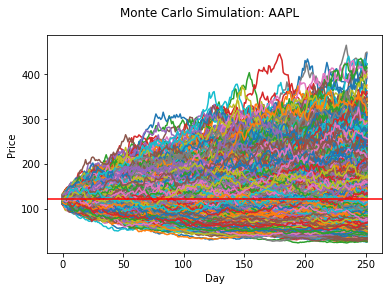

In [9]:
# visualization of graph
figu = plt.figure()
figu.suptitle('Monte Carlo Simulation: AAPL')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()